# Decision Tree from Scratch

Decision Tree is among the most important and powerful machine learning algorithm used across different industries. This algorithm is popular because it is easy to understand by practitioners and domain experts alike. Moreover, tree structure is easy to visualizae, thus making this tree algorithm less of a black box.

In this notebook, we will dig into the nitty-gritty detail of how a decision tree algorithm works. We will create a decision tree algorith on my own without the help of powerful sklearn package.

---

## What is a Decision Tree / CART?

CART stands for **Classfication and Regression Trees** and refers to the decision tree algorithms used for classification and regression problem. That is, the decision tree algorithm can be used to solve both for categorical and continuous tartget variable.

A decision tree classifier is built using a heuristic called **recursive partitioning** or **divide and conquer**. Along the process the samples will be broken down into smaller and smaller subsets so on and so forth until some stopping criterions are met. These subsets should be, if the tree algorithm works as predicted, more pure compared to the samples from the original nodes. This process is similar both for classification and regression trees.

The classifier algorithm is basically a **binary tree** where **predictions are made by traversing the tree from root to leaf** — at each node, **we go left if a feature is less than a threshold, right otherwise**. Each leaf will be associated with a class, which is the output of this classifier. In this notebook we will mostly **focus on CART for classification problem**.

In essence, a decision tree is no different from a binary tree or a tree structure.

<img src="pic/tree_structure.png">

From the plot above you can see that the decision tree consists of:

1. Nodes with criterion: Test for the value of a certain attribute. In decision tree model, it's the threshold criterion.

2. Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf. In decision tree model, it's either the value is above the threshold or under the threshold.

3. Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution). 


---

## How does the Decision Tree Algorithm work?

Before we start creating the decision tree algorithm, we need to understand how the model works in backend.

The decision tree works like the tree structure below.

<img src="pic/tree_viz.png" width=500>

Let's first take a look at the top block. First, the algorithm is considering whether or not the petal width is less than 0.8. If so, then it will follow the *True* node to the left, and the class will be predicted as a setosa; if not, then it will follow the *False* node to the right and continue another series of comparison.

This series of comparison will continue until certain criterion or limitation is reached. For example, for the decision tree algorithm in sklearn package there are some parameters like **max_depth** or **min_samples_split**. Those parameters are used to control how the decision tree should act. For more information you can take a look at the well-written [scikit-learn decision tree classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Beside series of comparison, you might also see an unfamiliar term called **gini**. This gini impurity is a crucial criterion for this decision tree algorithm. We will get into more detail later.


In this notebook, I will try to answer the questions below.

* How to calculate and evaluate candidate split points in a data.

* How to arrange splits into a decision tree structure.

* How to apply the classification and regression tree algorithm to a real problem.


Like any of the algorithm there must be a metric for evaluating the result. What is the metric used within the decision tree algorithm? The most popular one would be the **Gini Impurity**.

---
## Gini Impurtiy

Gini Impurtiy (Gini Index) is a metric describing how **pure** or **homogenerous** a node is. The less the gini impurtiy, the more the entire node belongs to the same class. That is, a node is pure (G = 0) if all its samples belong to the same class, while a node with samples belonging to many different classes will have a Gini Impurity closer to 1 (G $\approx$ 1).

The Gini Impurity is defined as follows:

$$G = 1 - \sum \limits_{k=1}^n (p_{k})^2$$

where $p_k$ denotes the fraction of samples belong to the class k.

Let's say we have five data points as below.

||1|2|3|4|5|
|:---:|:---:|:---:|:---:|:---:|:---:|
|Class|A|B|B|C|C|

So the Gini Impurtiy will be:

$$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$$

If they all belong to different classes (say A to E), the Gini impurity will be

$$G = 1 - 5 \times (\frac{1}{5})^2 = 0.8$$

which is much closer to 1.

**How is Gini Impurity used in Decision Tree Algorithm?**

Since the task here is to seperate classes by features provided in the dataset, the goal for this decision tree algorithm is to minimize the Gini Impurity level so that the bottom leaves will have only one or few classes in each leaf instead of mixed classes. 

Note that here we are talking about the classification task. What about the Regression part of the CART algorithm? The metric in Regression Trees are entropy instead of Gini Impurity, which is widely used to calculate the distance between continuous output. We will not dive into detail at here.

---

## When should we stop the Decision Tree from expanding?

There are plenty of criterions as for how to stop the algorithm from running further. A bulky binary tree might create the lowest total gini impurity at the bottom, but it takes more time and risk overfitting. We need some criterions to stop this from happening.

The first criterion used is **maximum depth**, meaning the maximum depth/level of the binary tree. If this variable is not set, then nodes are expanded until all leaves are pure (G = 0) or until all leaves contain less than **minimum samples split** samples. Once a maximum depth of the tree is met, the entire binary tree will stop splitting. This is a very important hyperparameter because deeper trees are more complex and are more likely to overfit the training data.

Here comes another criterion called **minimum samples split**, meaning the minimum number of samples needed to trigger another expansion to the next level. For example, if the minimum samples split is set to be 3, then if the node contains less than 3 samples, the node will not be expanded. This hyperparameter is significant in that if nodes account for too few training samples, those nodes are expected to be too specific and will be likely to overfit the training data.

When we do stop growing at a given point, that node is called a **terminal node** and is used to make a final prediction. There will be two cases.

1. All the classes associated with the samples within that nodes are identical. If so, the Gini impurity will be zero and thus all the samples will be predicted to be that class.

2. If there are multiple classes in the same nodes, all the samples will be predict as the majority class in that node. If the Gini impurity in that node is not zero, there comes some prediction errors.

There are plenty other criterions that can control this stopping process. For example, the **minimum impurity decrease** controls the tolerance threshold deciding whether or not the nodes need expanding. For more information check out the well-written [scikit-learn decision tree classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

---
## What is the goal of the Decision Tree Classifier?

Now we've talked about some of the stopping criterion, and we understand that the goal for this decision tree classifier is to minimize the total gini impurity. That is, **we need to find the optimal feature and threshold such that the Gini impurity is minimized**. To find the optimal feature and threshold, one can brute-force all the possible combinations, but this is by no means a good option. If you want to try this brute-force method, the time complexity will be $O(n^2)$.

Another simpler method is shown as follows:

1. Iterate through the **sorted feature values** as possible thresholds, 

2. Keep track of the number of samples per class on the left and on the right, 

3. Increment/decrement them by 1 after each threshold. From them we can easily compute Gini in constant time.

Using this method we can calculate the Gini impurity in constant time. If you plus the sorting process, the time complexity will be $O(n\log n)$.

Let's look at an example about this calculation. Suppose we have data points as follows.

|Data|1|2|3|4|5|
|:---:|:---:|:---:|:---:|:---:|:---:|
|Class|A|B|B|C|C|
|Feature|0.2|0.5|0.1|0.6|0.9|

The first step is to sort the feature values. Now the table will be like this.

|Data|3|1|2|4|5|
|:---:|:---:|:---:|:---:|:---:|:---:|
|Class|B|A|B|C|C|
|Feature|0.1|0.2|0.5|0.6|0.9|

Let's denote m as the size of the node and $m_k$ as the number of samples of class k in the node, then

$$G = 1 - \sum \limits_{k=1}^n (p_{k})^2 = 1 - \sum \limits_{k=1}^n (\frac{m_k}{m})^2$$

Let's suppose we are taking the i-th feature from the sorted feature values. The Gini score on the left leaf and the right left respectively will be

$$G_i^{left} = 1 - \sum \limits_{k=1}^n (\frac{m_k^{left}}{i})^2 $$

$$G_i^{right} = 1 - \sum \limits_{k=1}^n (\frac{m_k^{right}}{m-i})^2 $$

Then the resulting Gini is simply a weighted sum.

$$ G_i = \frac{i}{m} G_i^{left} + \frac{m-i}{m} G_i^{right}$$

---
## How to train the Decision Tree Classifier?

The decision tree classifier is basically trained in a recursive manner. That is, if the tree is not fully expanded yet, the tree will continue to grow by expanding their nodes. New nodes added to an existing node are called **child nodes**. A node may have zero children (a terminal node), one child (one side makes a prediction directly) or two child nodes. We will refer to the child nodes as left and right in the dictionary representation of a given node.

Once a node is created, we can create child nodes recursively on each group of data from the split by calling the same function again. This recursive process will stop once any of the stopping criterion introduced above is met. Note that some notes might terminate faster than other notes. Therefore, you can see some lopsided/unbalanced binary tree structure if you plot the splitting process out with some tree visualization packages.


---
## Full Code

In [44]:
import numpy as np


class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
    
    def _gini(self, y):
        """
        Compute Gini impurity of a non-empty node.
        """
        m = y.size
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))
    
    
    def _best_split(self, X, y):
        """
        Split the nodes based on gini score. 
        """
        # Need at least two elements to split a node.
        m = y.size
        if m <= 1:
            return(None, None)
        
        # Count of each class in the current node.
        num_parent = [np.sum(y == i) for i in range(self.n_classes_)]
        
        # Gini or current node.
        best_gini = 1.0 - sum((n/m)**2 for n in num_parent)
        best_idx, best_thr = None, None
        
        # Loop through all features and calculate the Gini impurity
        for idx in range(self.n_features_):
            # Sort data along selected feature. (O(nlogn))
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            
            # We can actually split the node according to each feature/threshold pair
            # and count the resulting population for each class in the children, but
            # instead we compute then in an iterative fashion, making this for loop
            # linear rather than quadratic.
            
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m): # all possible split positions
                c = classes[i-1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                
                # The Gini impurity of a split is the weighted average of the 
                # Gini impurity of the children.
                gini = (i * gini_left + (m-i) * gini_right) / m
                
                
                # The following condition is to make sure we don't try to split two
                # points with identical values for that feature, as it is impossible
                # (both have to end up on the same side of a split).
                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                if gini < best_gini: # the smaller the gini the more pure classes are
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i-1]) / 2 # midpoint
        return(best_idx, best_thr)

    def fit(self, X, y):
        """
        Build a decision tree classifier.
        """
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        """
        Build a decision tree by recursively finding the best split.
        """
        
        # Population for each class in current node.
        # The predicted class is the one with largest population.
        
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini = self._gini(y),
            num_samples = y.size,
            num_samples_per_class = num_samples_per_class,
            predicted_class = predicted_class
        )
        
        # Split recursively until maximum depth is reached.
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return(node)
    
    def predict(self, X):
        return([self._predict(inputs) for inputs in X])
    
    def _predict(self, inputs):
        """
        Predict class for a single sample.
        """
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left # if sample less than threshold
            else:
                node = node.right # if sample more than threshold
        return(node.predicted_class)

Now we have finished the Decision Tree Classifier! Let's import some data and try to visualize our tree to see if it works!

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set up our iris dataframe
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In order to do comparison as well as plotting, we will create another decision tree classifier from sklearn.

In [58]:
from sklearn.tree import DecisionTreeClassifier as sklearn_DecisionTree

# My Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Scikit-Learn's Decision Tree Classifier
sk_model = sklearn_DecisionTree(max_depth=3)
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, classification_report

print(f"The accuracy for my decision tree classifier is {np.round(accuracy_score(y_test, pred) * 100,2)}%.")
print(f"The accuracy for Scikit-Learn's decision tree classifier is {np.round(accuracy_score(y_test, sk_pred) * 100,2)}%.")

The accuracy for my decision tree classifier is 97.78%.
The accuracy for Scikit-Learn's decision tree classifier is 97.78%.


In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [69]:
print(classification_report(y_test, sk_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Using the accuracy metric as well as the classification report, we can see that for this simple iris dataset, our decision tree algorithm works as good as the scikit-learn's one. Let's use the sklearn's decision tree algorithm to plot out the recursive process and see how the algorithm works.

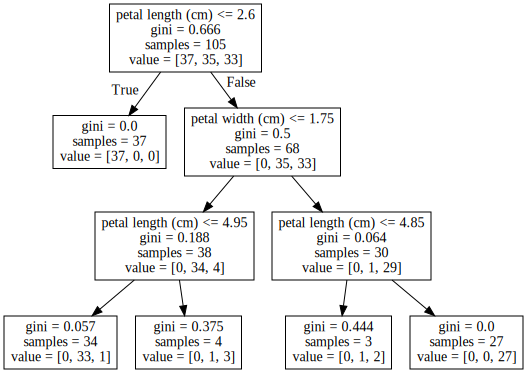

In [70]:
import graphviz
from sklearn import tree

features = iris.feature_names
tree_graph = tree.export_graphviz(sk_model, out_file=None, feature_names=features)

graphviz.Source(tree_graph)

---

## Advantages and Disadvantages for Decision Tree Algorithms

The advantages of using a decision tree algorithm (or its ensembled form RandomForest) are:

1. It's really **simple to understand and interpret**. People are able to understand decision tree models after a brief explanation, and **the process can even be plotted out like the graph above**. That is, it's not a black box model as opposed to neural network.

2. It is a **computationally inexpensive algorithm** compared to other classifiers with comparable performance.


The disadvantages of using a decision tree algorithm (or its ensembled form RandomForest) are:

1. It is **likely for a decision tree to overfit** if the parameter is not set properly. (say no max_depth is set)

2. The decision tree is not stable, meaning that a small change in the data can lead to a large change to the structure of the optimal decision tree.

3. One single decision tree can be relatively inaccurate. This can be solved by using the ensembled algorithm Random Forest Classifier.

4. For data including categorical variables with different number of classes, **information gain in decision trees is biased in favor of those attributes with more classes**.